In [1]:
import pandas as pd

names = ['Sex', 'Length', 'Diameter', 'Height', \
    'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
features = pd.read_csv('abalone/abalone.data', names=names)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The equation is Diameter = 2.1518 * Length + 1.3680
The correlation coefficient is: 0.5747


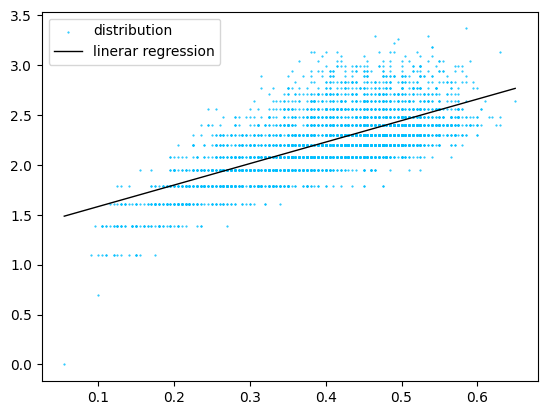

In [87]:
y = features.Rings
x = features.Diameter

plt.scatter(x, np.log(y), color='deepskyblue', marker='.', s=1)
m, b = np.polyfit(x, np.log(y), 1)
cc = np.corrcoef(x, y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, m*x_+b, color='black', linewidth=1)
plt.legend(['distribution', 'linerar regression'])
print("The equation is Diameter = {:.4f} * Length + {:.4f}".format(m, b))
print("The correlation coefficient is: {:.4f}".format(cc[0, 1]))

Quadratic model: Weight = -17.5551 * Diameter + 31.9299 * Diameter^2 + 0.0035
Correlation coefficient for quadratic model is: 0.5786


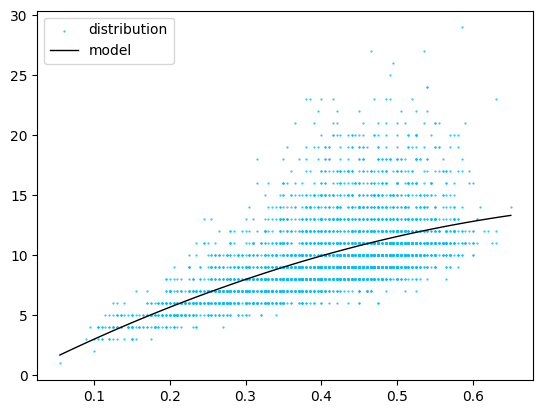

In [90]:
y = features.Rings
x = features.Diameter

plt.scatter(x, y, color='deepskyblue', marker='.', s=1)

a, b, c = np.polyfit(x, y, 2)
y_bar = [(a * x_**2 + b * x_ + c) for x_ in x]
cc = np.corrcoef(y_bar, y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, a*x_**2+b*x_+c, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Quadratic model: Weight = {:.4f} * Diameter + {:.4f} * Diameter^2 + {:.4f}".format(a, b, c))
print("Correlation coefficient for quadratic model is: {:.4f}".format(cc[0, 1]))

Quadratic model: Weight = 8.4344 * Diameter + -13.7835 * Diameter^2 + 8.7317
Correlation coefficient for quadratic model is: 0.5717


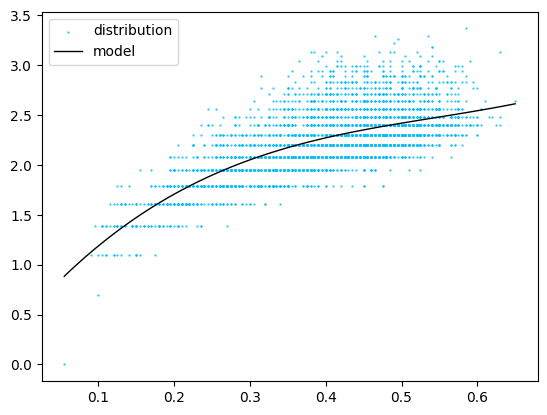

In [89]:
y = features.Rings
x = features.Diameter

plt.scatter(x, np.log(y), color='deepskyblue', marker='.', s=1)

a, b, c, d = np.polyfit(x, np.log(y), 3)
y_bar = [(a * x_**3 + b * x_**2 + c * x_ + d) for x_ in x]
cc = np.corrcoef(y_bar, y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, a*x_**3+b*x_**2+c*x_+d, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Quadratic model: Weight = {:.4f} * Diameter + {:.4f} * Diameter^2 + {:.4f}".format(a, b, c))
print("Correlation coefficient for quadratic model is: {:.4f}".format(cc[0, 1]))

Cubic model: Weight = e ^ (1.7394 * x + 1.3342)
Correlation coefficient for exponential x is: 0.5410
Correlation coefficient for log y is: 0.6538


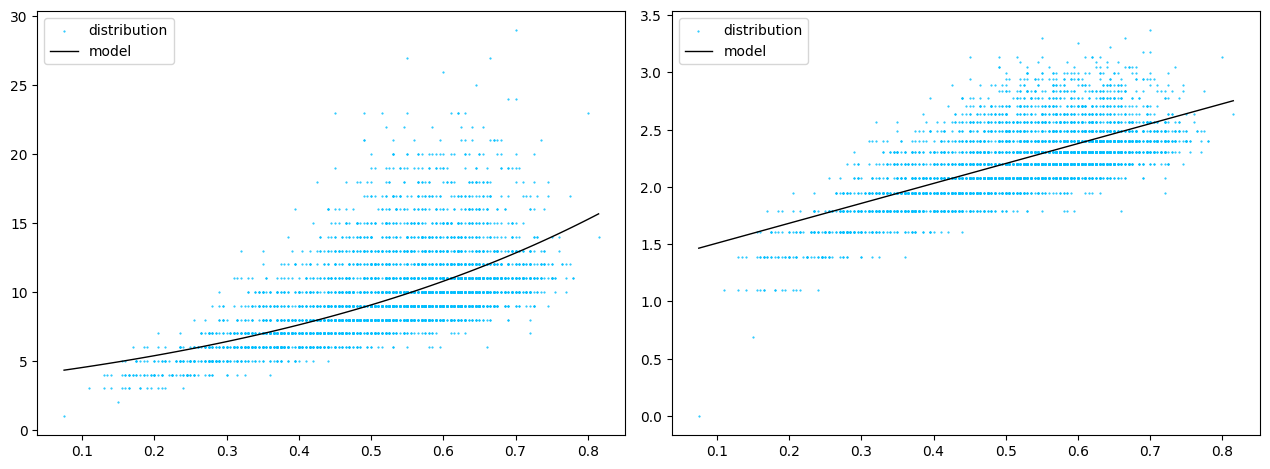

In [86]:
y = features.Rings
x = features.Length

plt.figure(figsize=(12.8,4.8))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='deepskyblue', marker='.', s=1)

a, b = np.polyfit(x, np.log(y), 1)
cc = np.corrcoef(np.exp(a*x+b), y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, np.exp(a*x_+b), color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Cubic model: Weight = e ^ ({:.4f} * x + {:.4f})".format(a, b))
print("Correlation coefficient for exponential x is: {:.4f}".format(cc[0, 1]))

plt.subplot(1, 2, 2)
plt.scatter(x, np.log(y), color='deepskyblue', marker='.', s=1)

cc = np.corrcoef(x, np.log(y))
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, a*x_+b, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Correlation coefficient for log y is: {:.4f}".format(cc[0, 1]))

plt.tight_layout()

In [35]:
pieces = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

y = features.Rings
x = features[pieces]
X = np.concatenate((np.ones((len(x), 1)), x), axis=1)

w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, y))
y_bar = np.dot(X, w)
cc = np.corrcoef(y_bar, y)
print("The correlation coefficient of this multilinear model is: {:.4f}".format(cc[0, 1]))

The correlation coefficient of this multilinear model is: 0.7264


In [63]:
pieces = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

y = features.Rings
x = features[pieces]
X = np.concatenate((np.ones((len(x), 1)), x), axis=1)

w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, np.log(y)))
y_bar = np.dot(X, w)
# cc = np.corrcoef(y_bar, np.log(y))
cc = np.corrcoef(np.exp(y_bar), y)
print("The correlation coefficient of this multilinear model is: {:.4f}".format(cc[0, 1]))

The correlation coefficient of this multilinear model is: 0.7034


In [62]:
pieces = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

y = features.Rings
x = features[pieces]
X = np.concatenate((np.ones((len(x), 1)), x, np.power(x, 2)), axis=1)

w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, y))
y_bar = np.dot(X, w)
cc = np.corrcoef(y_bar, y)
print("The correlation coefficient of this multilinear model is: {:.4f}".format(cc[0, 1]))

The correlation coefficient of this multilinear model is: 0.7524


In [64]:
SexI = []
SexM = []
for i in features.Sex:
    if i == 'I':
        SexI.append(1)
        SexM.append(0)
    elif i == 'M':
        SexI.append(0)
        SexM.append(1)
    else:
        SexI.append(0)
        SexM.append(0)

In [78]:
pieces = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

y = features.Rings
x = features[pieces]
X = np.concatenate((np.ones((len(x), 1)), np.array(SexI).reshape(-1, 1),
    np.array([SexM]).reshape(-1, 1), x), axis=1)

w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, np.log(y)))
y_bar = np.dot(X, w)
cc = np.corrcoef(y_bar, np.log(y))
#cc = np.corrcoef(np.exp(y_bar), y)
print("The correlation coefficient of this multilinear model is: {:.4f}".format(cc[0, 1]))
print(list(w))

The correlation coefficient of this multilinear model is: 0.7740
[1.3411846779730823, -0.09248543995009229, 0.008925789377490778, 0.5330489618824359, 1.4235752491447329, 1.2066250982164917, 0.6082523064366114, -1.6570462267590642, -0.8354988361403457, 0.6068136622646989]


In [74]:
pieces = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

y = features.Rings
x = features[pieces]
X = np.concatenate((np.ones((len(x), 1)), np.array(SexI).reshape(-1, 1),
    np.array([SexM]).reshape(-1, 1), x, np.power(x, 2)), axis=1)

w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, np.log(y)))
y_bar = np.dot(X, w)
# cc = np.corrcoef(y_bar, np.log(y))
cc = np.corrcoef(np.exp(y_bar), y)
print("The correlation coefficient of this multilinear model is: {:.4f}".format(cc[0, 1]))
print(list(w))

The correlation coefficient of this multilinear model is: 0.7567
[0.7415696386791208, -0.07655764665493288, 0.0023932897458419223, 2.056191726608007, 3.2209827439114496, 1.580345317473255, 1.4128610838798619, -3.120779340764847, -1.4096366548730674, 1.4978306114510034, -2.34468256261207, -3.1081112112710607, -1.2877036885420174, -0.24753734250048962, 1.3896372796940213, 1.3558987429363234, -0.8207249935407028]
